In [5]:
!pip install folium

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [7]:
# Load the traffic accident data
accidents = pd.read_csv(r"C:\Users\indum\Downloads\US_Accidents_Dec21_updated.csv")

In [8]:
# Convert Start_Time and End_Time columns to datetime format
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

In [9]:
# Extract hour of day from Start_Time column
accidents['Hour'] = accidents['Start_Time'].dt.hour

In [10]:
# Create a new column for road conditions (e.g. bump, crossing, etc.)
accidents['Road_Condition'] = accidents.apply(lambda row: ', '.join([col for col in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'] if row[col] == 1]), axis=1)

In [12]:
accidents['Weather_Condition'].fillna('Unknown', inplace=True)
accidents['Weather_Condition_Cat'] = accidents['Weather_Condition'].apply(lambda x: 'Clear' if 'clear' in x.lower() else ('Cloudy' if 'cloud' in x.lower() else 'Rainy'))

In [13]:
# Group accidents by hour of day and road condition, and count the number of accidents
hourly_accidents = accidents.groupby(['Hour', 'Road_Condition']).size().reset_index(name='Count')

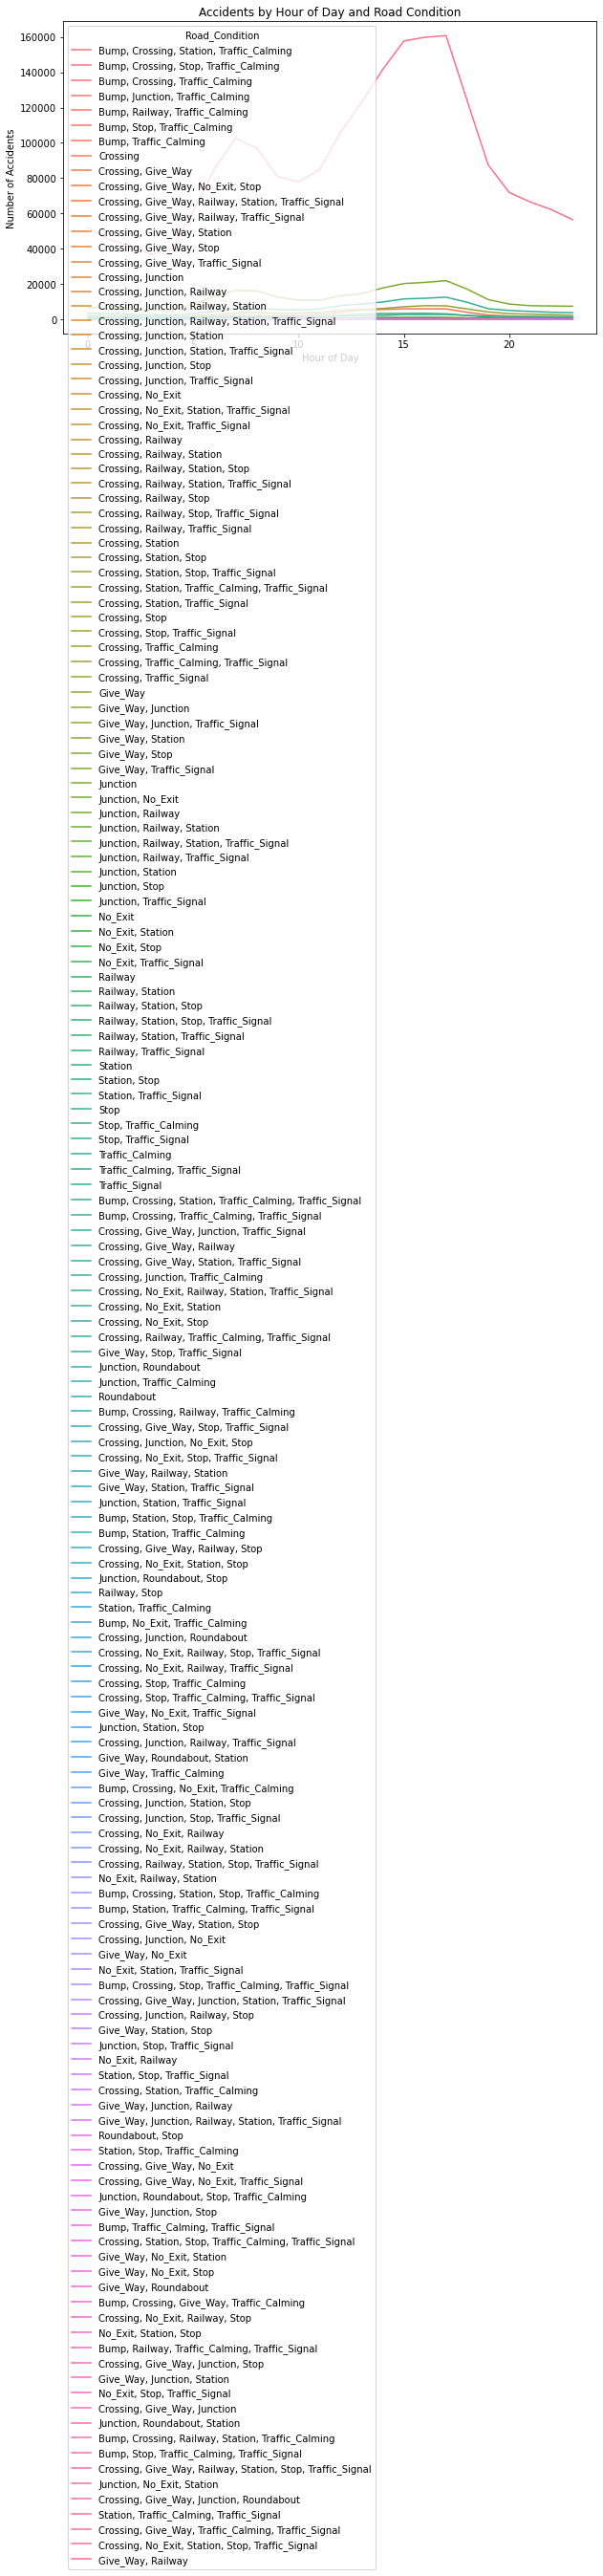

In [14]:
# Plot the number of accidents by hour of day and road condition
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Count', hue='Road_Condition', data=hourly_accidents)
plt.title('Accidents by Hour of Day and Road Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

In [15]:
# Group accidents by weather condition and road condition, and count the number of accidents
weather_accidents = accidents.groupby(['Weather_Condition_Cat', 'Road_Condition']).size().reset_index(name='Count')

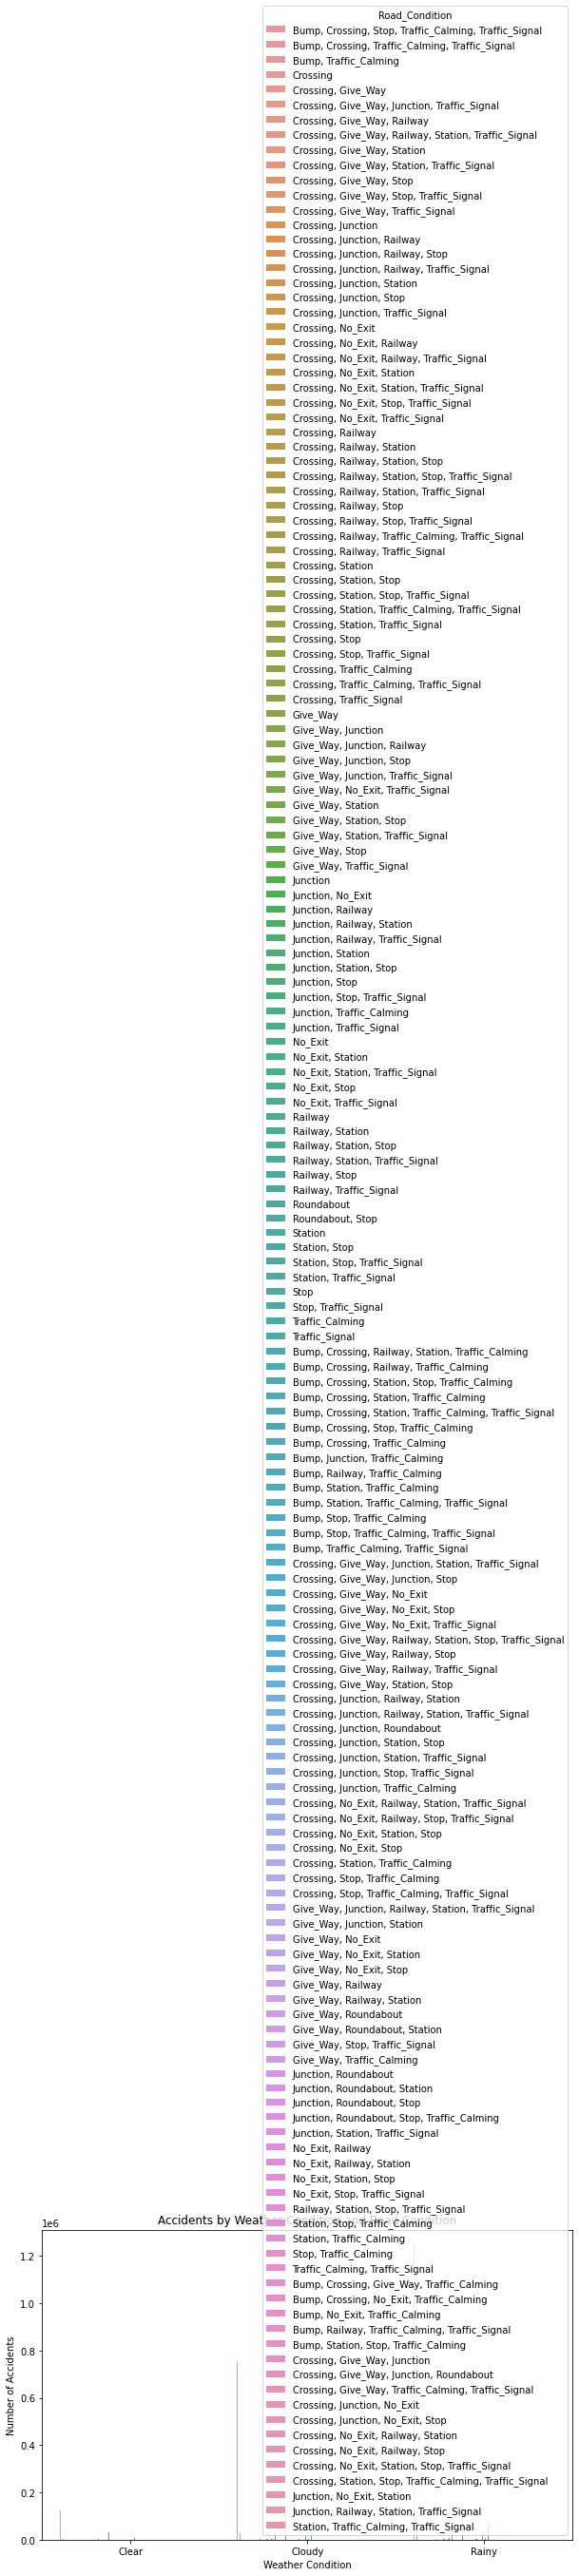

In [16]:
# Plot the number of accidents by weather condition and road condition
plt.figure(figsize=(10,6))
sns.barplot(x='Weather_Condition_Cat', y='Count', hue='Road_Condition', data=weather_accidents)
plt.title('Accidents by Weather Condition and Road Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

In [17]:
# Create a Folium map to visualize accident hotspots
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)


In [ ]:
# Assuming you have already created the Folium map 'm'
accidents.apply(lambda row: folium.Marker([row['Start_Lat'], row['Start_Lng']],
                                          popup=f"Accident at {row['Start_Time']} with severity {row['Severity']} and road condition {row['Road_Condition']}").add_to(m), axis=1)

In [ ]:
# Display the map
m